# 첫 번째 심층 신경망

## 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


## 데이터 적재

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

## 모델 만들기

#### Sequential 모델을 사용한 방법

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Dense(200, activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_2 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


Sequential 모델은 일렬로 층을 샇은 네트워크를 빠르게 만들 때 사용하기 좋다.  
어떤 분기 없이 이전 층이 그대로 다음 층으로 연결된다.  
하지만 많은 모델은 한 층의 출력이 여러 개의 별도의 층으로 전달되는 분기가 있거나 반대로 한 층이 여러 층으로부터 입력을 받는다.  
이런 가지가 있는 네트워크를 만들려면 유연성이 많은 함수형 API를 사용해야 함. 그렇기 때문에 함수형 API를 권장.

#### 함수형 API를 사용한 네트워크

In [8]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)    # Flatten 클래스 객체를 만든 후 input_layer로 호출.. 케라스는 이런식의 객체 호출을 많이 사용한다.

x = Dense(200, activation = 'relu')(x)   # Activation을 별도의 층으로 사용할 수도 있다.
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_8 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [11]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## 모델 훈련

In [12]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 11s 223us/step - loss: 1.8439 - acc: 0.3363
Epoch 2/10
50000/50000 [==============================] - 10s 210us/step - loss: 1.6731 - acc: 0.4023
Epoch 3/10
50000/50000 [==============================] - 11s 210us/step - loss: 1.5933 - acc: 0.4331
Epoch 4/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.5352 - acc: 0.4515
Epoch 5/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.4982 - acc: 0.4663
Epoch 6/10
50000/50000 [==============================] - 11s 214us/step - loss: 1.4616 - acc: 0.4805
Epoch 7/10
50000/50000 [==============================] - 11s 214us/step - loss: 1.4285 - acc: 0.4907
Epoch 8/10
50000/50000 [==============================] - 11s 211us/step - loss: 1.4088 - acc: 0.4992
Epoch 9/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.3834 - acc: 0.5073
Epoch 10/10
50000/50000 [=========

## 모델 평가

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/step


[1.4379517992019653, 0.4844]

In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

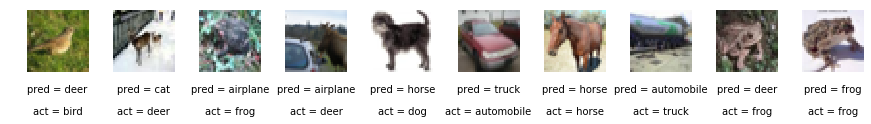

In [16]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
